### 유임승차 승객수가 가장 많은 역과 승객수 조회

In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
with open('data/202308_subway.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    maxInfo = ['', 0] 
    # maxInfo[0] : 유임승차 승객수가 가장 많은 역
    # maxInfo[1] :  유임승차 승객수가 가장 많은 역의 승객수
    for row in data:
        row[4] = int(row[4].replace(",", ''))
        if row[4] >  maxInfo[1]:
            maxInfo[0] = row[3]
            maxInfo[1] = row[4]
            
    print(f'유임승차 승객수가 가장많은 역은 [{maxInfo[0]}]이고, 승객수는 {maxInfo[1]}이다.')

유임승차 승객수가 가장많은 역은 [강남]이고, 승객수는 2135670이다.


### 유임승차, 유임하차, 무임승차, 무임하차 승객수가 가장많은 역

In [3]:
with open('data/202308_subway.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    stations = [''] * 4
    max_persons = [0] * 4
#     print(stations, max_persons)
    for row in data:
        for i in range(4):
            person = int(row[4+i].replace(',', ''))
            if person > max_persons[i]:
                stations[i] = row[3]
                max_persons[i] = person
    
    titles = ['유임승차', '유임하차', '무임승차', '무임하차']
    for i in range(len(stations)):
        print(f'{titles[i]} : {stations[i]}({max_persons[i]}명)')

유임승차 : 강남(2135670명)
유임하차 : 홍대입구(2100640명)
무임승차 : 영등포(279986명)
무임하차 : 영등포(280606명)


### 출근시간(오전7시)에 가장 많은 승객이 승차하는 역을 검색

In [4]:
with open('data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    station = ''
    max_person = 0
    station2 = ''
    max_person2 = 0
    for row in data:
        person = int(row[10].replace(",", ''))
        person2 = int(row[11].replace(",", ''))
        if person > max_person:
            station = f'{row[3]}({row[1]})'
            max_person = person
        if person2 > max_person2:
            station2 = f'{row[3]}({row[1]})'
            max_person2 = person2
    print(f'승차 {station} : {max_person}명, 하차 {station2} : {max_person2}명')
        

승차 신림(2호선) : 186200명, 하차 역삼(2호선) : 156824명


### 출근시간대(7시, 8시, 9시) 승차승객수가 가장 많은 역 조회

신림(2호선) : 613852명


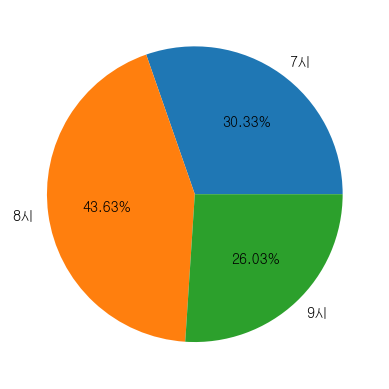

In [5]:
# a = ['12','9','234','5']
# a = list(map(int,a))
# print(a, type(a))

def to_int(data):
    return int(data.replace(',', ''))

with open('data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    max_persons = [0]
    stations = ''
    for row in data:
        persons = row[10:15:2]
        persons = list(map(to_int, persons))
#         print(persons, sum(persons))
#         persons = [ int(p.replace(",", '')) for p in row[10:15:2]]
#         print(persons, sum(persons))

        if sum(persons) > sum(max_persons):
            stations = f'{row[3]}({row[1]})'
            max_persons = persons
    print(f'{stations} : {sum(max_persons)}명')
    
    plt.rc('font', family='gulim')
    plt.pie(max_persons, labels=['7시', '8시', '9시'], autopct='%.2f%%')

### 1. 시간대를 입력(24시) : 9
### 2. 9시대에 가장 많은 승차인원을 가진 역과 인원수 출력

In [7]:
with open('data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    station = ''
    max_person = 0
    time = int(input("시간을 입력해주세요(24시간) : "))
    for row in data:
        person = int(row[2 * time - 4].replace(",", ''))
        if person > max_person:
            station = f'{row[3]}({row[1]})'
            max_person = person
    print(f'{time}시에 가장 많이 승차 {station} : {max_person}명')

시간을 입력해주세요(24시간) : 22
22시에 가장 많이 승차 홍대입구(2호선) : 183147명


In [13]:
with open('data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    time = int(input("시간을 입력해주세요(24시간) : "))
    
    
    station =''
    max_persons = 0
    index = time * 2 - 4
    for row in data:
        row[index] = row[index].replace(',', '')
        if max_persons < int(row[index]) :
            max_persons = int(row[index])
            station = f'{row[3]}({row[1]})'
    print(f'{time}시에 가장 많이 승차 {station} : {max_person}명')

시간을 입력해주세요(24시간) : 22
22시에 가장 많이 승차 홍대입구(2호선) : 183147명


In [ ]:
with open('data/202308_time.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file)
    next(data)
    next(data)
    station =''
    max_persons = 0
    for row in data:
        